In [1]:
import pickle
import matplotlib.pyplot as plt
import itertools
import numpy as np

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [2]:
d_file = open("./src/generated_files/hmm_results.pkl", "rb")
hmm_results = pickle.load(d_file)

g_file = open("./src/generated_files/sorted_dict_HMM.pkl", "rb")
hmm_counts = pickle.load(g_file)

b_file = open("./src/generated_files/sorted_dict_prob_baseline.pkl", "rb")
prob_baseline = pickle.load(b_file)

c_file = open("./src/generated_files/sorted_dict_random_baseline.pkl", "rb")
random_baseline = pickle.load(c_file)

hmm_counts = dict(itertools.islice(hmm_counts.items(), 1, None))
prob_baseline = dict(itertools.islice(prob_baseline.items(), 1, None))
random_baseline = dict(itertools.islice(random_baseline.items(), 1, None))

### Plotting

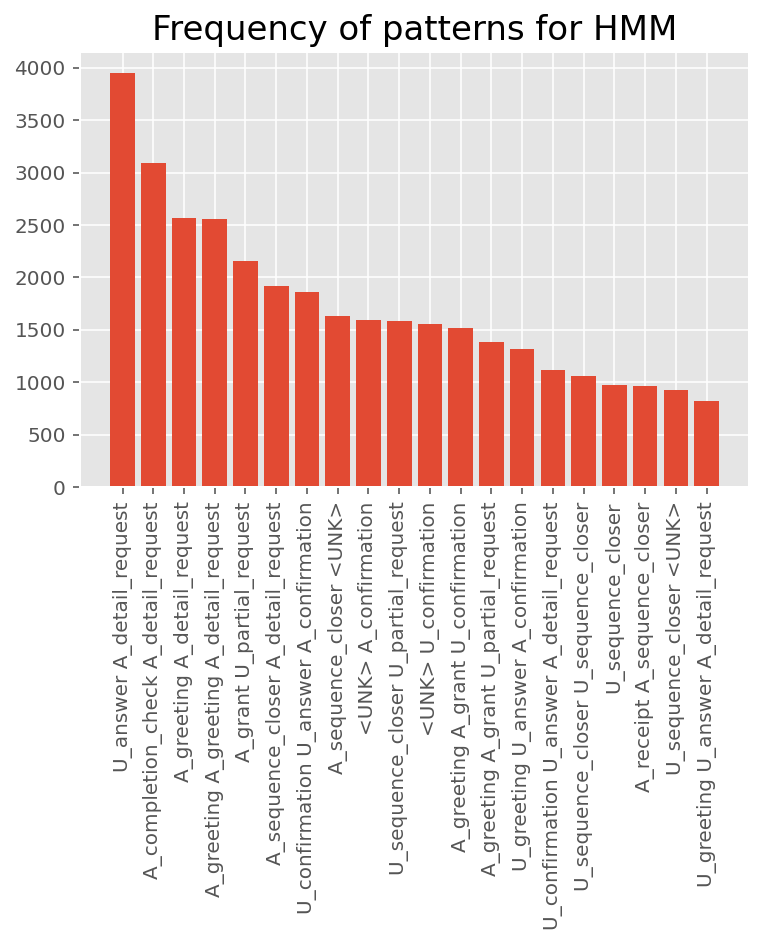

In [68]:
sliced_hmm_only = dict(itertools.islice(hmm_counts.items(), 0,20))
names = list(sliced_hmm_only.keys())

plt.bar(range(len(sliced_hmm_only)), list(sliced_hmm_only.values()), tick_label=names)
plt.xticks(rotation = 'vertical')
plt.title("Frequency of patterns for HMM", fontsize=17)
plt.savefig('./src/generated_files/top_freq_patterns_HMM.png')
plt.show()

In [61]:
#choose size of slice to be plotted

sliced_hmm = dict(itertools.islice(hmm_counts.items(), 0,80))
sliced_rand = dict(itertools.islice(random_baseline.items(), 0,80))
sliced_prob = dict(itertools.islice(prob_baseline.items(), 0,80))

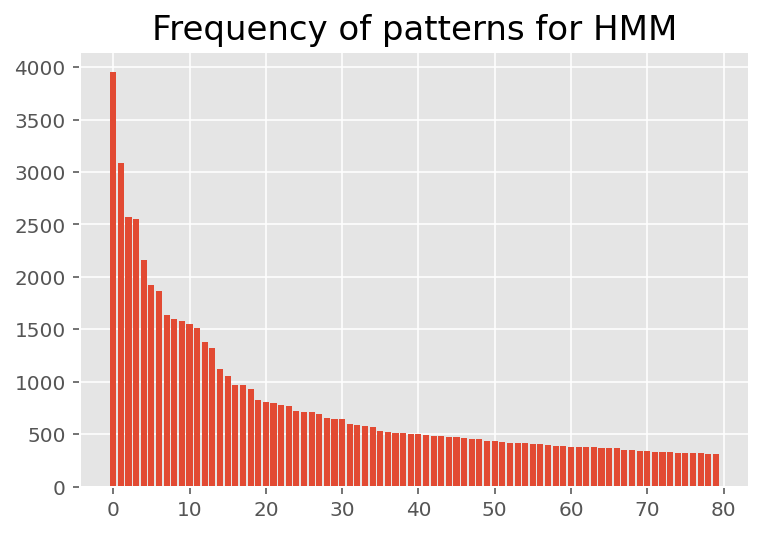

In [65]:
names = list(sliced_hmm.keys())

plt.bar(range(len(sliced_hmm)), list(sliced_hmm.values())) #, tick_label=names)
plt.title("Frequency of patterns for HMM", fontsize=17)
plt.show()

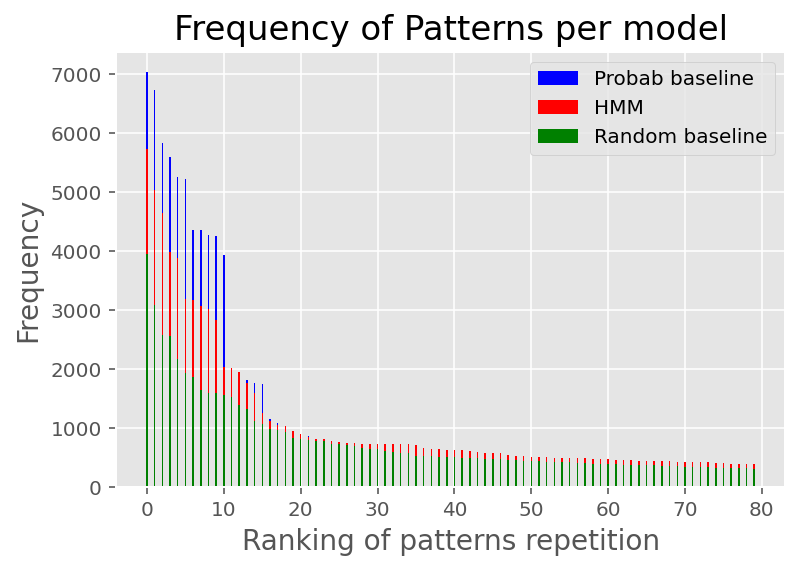

In [45]:

X = np.arange(len(sliced_prob))
ax = plt.subplot(111)
ax.bar(X, sliced_prob.values(), width=0.2, color='b', align='center')
ax.bar(X- 0.0001, sliced_rand.values(), width=0.2, color='r', align='center')
ax.bar(X- 0.0001, sliced_hmm.values(), width=0.2, color='g', align='center')
ax.legend(('Probab baseline', 'HMM','Random baseline'))
plt.xlabel("Ranking of patterns repetition", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Frequency of Patterns per model", fontsize=17)
plt.savefig('./src/generated_files/freq_of_patterns_per_model.png')
plt.show()

In [49]:
a_file = open("./src/generated_files/input_hmm.pkl", "rb")
input_hmm = pickle.load(a_file)

unigram = input_hmm.get('unigram')

len(unigram)

17289

In [50]:
a_file = open('./src/generated_files/baseline_splits_hidden_and_dfvisualization.pkl', "rb")
results_base = pickle.load(a_file)
rand_baseline_split = results_base.get('rand_baseline_split')
prob_baseline_split = results_base.get('prob_baseline_split')

In [51]:
print(len(results_base.get('rand_baseline_split')))
print(len(results_base.get('prob_baseline_split')))

17289
17289


In [52]:
def flatten(t):
    # https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
    return [item for sublist in t for item in sublist]

### Information summary

In [56]:
flat_uni = flatten(unigram)

print('number of dialogues in dataset:')
print(len(unigram))

print('number of DAs in whole dataset:')
print(len(flat_uni) - len(unigram)*4)  #because 4 special tokens per dialog)

print('number of patterns found in HMM:')
print(len(hmm_counts))

print('sum of counts of all patterns found in HMM:')
print(sum(hmm_counts.values()))

print('sum of counts of all patterns found in prob_bas:')
print(sum(prob_baseline.values()))

print('sum of counts of all patterns found in rand_bas:')
print(sum(random_baseline.values()))

print('number of different patterns found per dict. HMM:')
print(len(hmm_counts))

print('number of different patterns found per dict. prob_bas:')
print(len(prob_baseline))

print('number of different patterns found per dict. rand_bas:')
print(len(random_baseline))

print('ratio total DA/patterns found. Avg size of each pattern')
print((len(flat_uni) - len(unigram)*4)/sum(hmm_counts.values()))

number of dialogues in dataset:
17289
number of DAs in whole dataset:
613681
number of patterns found in HMM:
25536
sum of counts of all patterns found in HMM:
167733
sum of counts of all patterns found in prob_bas:
192649
sum of counts of all patterns found in rand_bas:
205426
number of different patterns found per dict. HMM:
25536
number of different patterns found per dict. prob_bas:
37038
number of different patterns found per dict. rand_bas:
20285
ratio total DA/patterns found. Avg size of each pattern
3.6586777795663346
